In [244]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix,precision_score,recall_score,f1_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn import tree
import plotly.offline as py
from sklearn.neighbors import KNeighborsClassifier
import warnings
from sklearn.naive_bayes import GaussianNB

In [120]:
df=pd.read_csv("C:\\Users\\User\\Desktop\\Data Science\\Research Work\\MyProject\\Online-Shopping-Review\\Dataset\\Online Shopping Review.csv")

# Rename The Column Names

In [121]:
my_cols=["Time","Name","Age","Gender","About Shopping","Shopping For","Finding For",
         "Visiting Issue","Compared to OS","Complacency","Find ERP","Payment Complacency",
         "CheckOut Experience","Product Receive TimeLine","Rider Review","CS Experience"]

In [122]:
df.columns=my_cols

In [123]:
#Using ' ' to replace the column names
columns= list(df.columns)
adder = ""
new_columns =[]
for each_column in columns:
    for letter in each_column:
        if letter==" ":
            adder = adder + "_"
        else:
            adder = adder + letter
    new_columns.append(adder)
    adder=""
new_columns

['Time',
 'Name',
 'Age',
 'Gender',
 'About_Shopping',
 'Shopping_For',
 'Finding_For',
 'Visiting_Issue',
 'Compared_to_OS',
 'Complacency',
 'Find_ERP',
 'Payment_Complacency',
 'CheckOut_Experience',
 'Product_Receive_TimeLine',
 'Rider_Review',
 'CS_Experience']

In [124]:
df.columns=new_columns

In [125]:
df

,Time,Name,Age,Gender,About_Shopping,Shopping_For,Finding_For,Visiting_Issue,Compared_to_OS,Complacency,Find_ERP,Payment_Complacency,CheckOut_Experience,Product_Receive_TimeLine,Rider_Review,CS_Experience
0,6/17/2022 0:46:08,Rajesh Das,25,Male,Newspaper,Friend,Yes,Product Information,Pricing,Neutral,Yes,Very Safe,3,No,2,3
1,6/17/2022 1:55:47,Radhika,22,Female,Social Media,Friend,Yes,Product Information,Website performance,Very satisfied,Yes,Safe,3,Yes,5,5
2,6/17/2022 1:52:21,Sourav Pathok,23,Male,Social Media,Other,Maybe,About Company,Overall,Satisfied,Yes,Safe,1,Yes,1,1
3,6/17/2022 1:57:38,Ritu,21,Female,Social Media,Friend,Yes,Buying Products,Website performance,Very satisfied,Yes,Safe,5,Yes,5,5
4,6/17/2022 2:01:02,Nandini,24,Female,Friend,Parent,Yes,Buying Products,Website performance,Very satisfied,Yes,Safe,5,Yes,5,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
795,6/23/2022 18:30:34,Raisa Rayyan,23,Female,Newspaper,Boss,Maybe,Buying Products,Pricing,Neutral,Yes,Neutral,5,No,5,4
796,6/23/2022 18:31:13,Rijvi Akter,27,Female,Friend,Colleague,No,Other,Online help,Satisfied,No,Not Safe,5,No,5,5
797,6/23/2022 18:31:49,Tanisa Santa,37,Female,Newspaper,Me,No,Buying Products,Overall,Very dissatisfied,No,Neutral,5,Maybe,5,5
798,6/23/2022 18:32:31,Fariya Ahmed,26,Female,Search Engine,Boss,No,Other,Shipping options,Satisfied,No,Safe,5,Yes,5,5


In [126]:
df.shape

(800, 16)

# Drop  Unnecessary Columns

In [127]:
df1=df.drop(["Time","Name"],axis=1)

In [128]:
df1.shape

(800, 14)

In [129]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 14 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       800 non-null    int64 
 1   Gender                    800 non-null    object
 2   About_Shopping            800 non-null    object
 3   Shopping_For              800 non-null    object
 4   Finding_For               800 non-null    object
 5   Visiting_Issue            800 non-null    object
 6   Compared_to_OS            800 non-null    object
 7   Complacency               800 non-null    object
 8   Find_ERP                  800 non-null    object
 9   Payment_Complacency       800 non-null    object
 10  CheckOut_Experience       800 non-null    int64 
 11  Product_Receive_TimeLine  800 non-null    object
 12  Rider_Review              800 non-null    int64 
 13  CS_Experience             800 non-null    int64 
dtypes: int64(4), object(10)
me

In [130]:
df1.describe()

,Age,CheckOut_Experience,Rider_Review,CS_Experience
count,800.000000,800.000000,800.000000,800.000000
mean,29.925000,4.276250,4.182500,3.948750
std,9.320433,0.966231,1.024942,1.198089
min,11.000000,1.000000,1.000000,1.000000
25%,23.000000,4.000000,4.000000,3.000000
50%,28.000000,5.000000,4.000000,4.000000
75%,34.000000,5.000000,5.000000,5.000000
max,76.000000,5.000000,5.000000,5.000000


# Outlier detection and removal using IQR 

# Checking Null Values

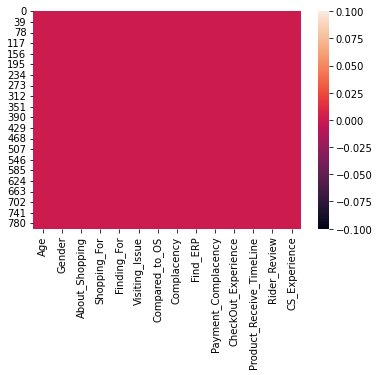

In [131]:
sns.heatmap(df1.isnull())
plt.show()

In [132]:
df1[df1.isnull().any(axis=1)].head()

,Age,Gender,About_Shopping,Shopping_For,Finding_For,Visiting_Issue,Compared_to_OS,Complacency,Find_ERP,Payment_Complacency,CheckOut_Experience,Product_Receive_TimeLine,Rider_Review,CS_Experience


In [133]:
df1.isnull().sum()

Age                         0
Gender                      0
About_Shopping              0
Shopping_For                0
Finding_For                 0
Visiting_Issue              0
Compared_to_OS              0
Complacency                 0
Find_ERP                    0
Payment_Complacency         0
CheckOut_Experience         0
Product_Receive_TimeLine    0
Rider_Review                0
CS_Experience               0
dtype: int64

In [134]:
print("%18s %10s   %10s %10s" % ("Column Name", "Data Type", "#Distinct", "NA Values"))
for col in df.columns:
    dtyp = df[col].dtype
    uniq = df[col].nunique()
    na = df[col].isna().sum()
    print("%18s %10s %10s %10s" % (col, dtyp, uniq, na))

       Column Name  Data Type    #Distinct  NA Values
              Time     object        800          0
              Name     object        764          0
               Age      int64         52          0
            Gender     object          3          0
    About_Shopping     object          6          0
      Shopping_For     object          6          0
       Finding_For     object          3          0
    Visiting_Issue     object          5          0
    Compared_to_OS     object          8          0
       Complacency     object          5          0
          Find_ERP     object          3          0
Payment_Complacency     object          5          0
CheckOut_Experience      int64          5          0
Product_Receive_TimeLine     object          3          0
      Rider_Review      int64          5          0
     CS_Experience      int64          5          0


# Seperate Categorical and Numerical Features

In [135]:
categorical_features=[]
numerical_features=[]

In [137]:
for i in df1.columns.tolist():
    if df1[i].dtype=="object":
        categorical_features.append(i)
    else:
        numerical_features.append(i)

In [138]:
print("-"*40)
print("Numerical Features")
print("-"*40)
for i in numerical_features:
    print('Feature: ',i)

----------------------------------------
Numerical Features
----------------------------------------
Feature:  Age
Feature:  CheckOut_Experience
Feature:  Rider_Review
Feature:  CS_Experience
Feature:  Age
Feature:  CheckOut_Experience
Feature:  Rider_Review
Feature:  CS_Experience


In [139]:
print("-"*40)
print("Categorical Features")
print("-"*40)
for i in categorical_features:
    print('Feature:',i)

----------------------------------------
Categorical Features
----------------------------------------
Feature: Gender
Feature: About_Shopping
Feature: Shopping_For
Feature: Finding_For
Feature: Visiting_Issue
Feature: Compared_to_OS
Feature: Complacency
Feature: Find_ERP
Feature: Payment_Complacency
Feature: Product_Receive_TimeLine
Feature: Gender
Feature: About_Shopping
Feature: Shopping_For
Feature: Finding_For
Feature: Visiting_Issue
Feature: Compared_to_OS
Feature: Complacency
Feature: Find_ERP
Feature: Payment_Complacency
Feature: Product_Receive_TimeLine


# Checking Unique Value Per Column

In [140]:
for col in new_columns[3:]:
    print("-------------------")
    print("Column Name Is",col)
    print("-------------------")
    print(df[col].unique())  

-------------------
Column Name Is Gender
-------------------
['Male' 'Female' 'Other']
-------------------
Column Name Is About_Shopping
-------------------
['Newspaper' 'Social Media' 'Friend' 'TV' 'Other' 'Search Engine']
-------------------
Column Name Is Shopping_For
-------------------
['Friend' 'Other' 'Parent' 'Colleague' 'Boss' 'Me']
-------------------
Column Name Is Finding_For
-------------------
['Yes' 'Maybe' 'No']
-------------------
Column Name Is Visiting_Issue
-------------------
['Product Information' 'About Company' 'Buying Products'
 'Contact Information' 'Other']
-------------------
Column Name Is Compared_to_OS
-------------------
['Pricing' 'Website performance' 'Overall' 'Product catalog'
 'Product information' 'Shipping options' 'Online help'
 'Payment experience']
-------------------
Column Name Is Complacency
-------------------
['Neutral' 'Very satisfied' 'Satisfied' 'Dissatisfied' 'Very dissatisfied']
-------------------
Column Name Is Find_ERP
-----------

In [141]:
for col in new_columns[3:]:
    print("-------------------")
    print("Column Name Is",col)
    print("-------------------")
    print(df1[col].value_counts())  

-------------------
Column Name Is Gender
-------------------
Male      437
Female    360
Other       3
Name: Gender, dtype: int64
-------------------
Column Name Is About_Shopping
-------------------
Social Media     215
Friend           170
Search Engine    150
Newspaper        149
TV                78
Other             38
Name: About_Shopping, dtype: int64
-------------------
Column Name Is Shopping_For
-------------------
Parent       188
Friend       157
Me           149
Colleague    134
Boss         111
Other         61
Name: Shopping_For, dtype: int64
-------------------
Column Name Is Finding_For
-------------------
Yes      374
No       223
Maybe    203
Name: Finding_For, dtype: int64
-------------------
Column Name Is Visiting_Issue
-------------------
Buying Products        221
Product Information    211
About Company          164
Contact Information    155
Other                   49
Name: Visiting_Issue, dtype: int64
-------------------
Column Name Is Compared_to_OS
-------

# Co-Relation

<AxesSubplot:>

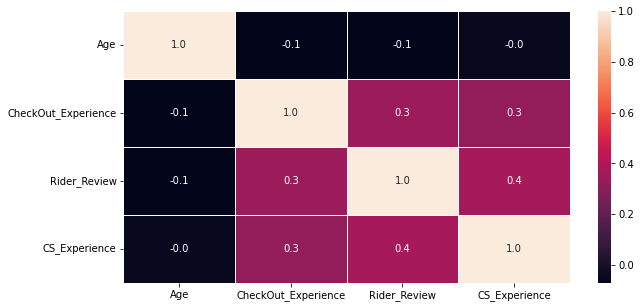

In [142]:
f,ax = plt.subplots(figsize=(10, 5))
sns.heatmap(df1.corr(), annot=True, linewidths=.5, fmt= '.1f',ax=ax)

# Separate X and Y

In [143]:
target=df1["Complacency"]

In [144]:
x=df1.drop(["Complacency"],axis=1)

In [145]:
x.head()

,Age,Gender,About_Shopping,Shopping_For,Finding_For,Visiting_Issue,Compared_to_OS,Find_ERP,Payment_Complacency,CheckOut_Experience,Product_Receive_TimeLine,Rider_Review,CS_Experience
0,25,Male,Newspaper,Friend,Yes,Product Information,Pricing,Yes,Very Safe,3,No,2,3
1,22,Female,Social Media,Friend,Yes,Product Information,Website performance,Yes,Safe,3,Yes,5,5
2,23,Male,Social Media,Other,Maybe,About Company,Overall,Yes,Safe,1,Yes,1,1
3,21,Female,Social Media,Friend,Yes,Buying Products,Website performance,Yes,Safe,5,Yes,5,5
4,24,Female,Friend,Parent,Yes,Buying Products,Website performance,Yes,Safe,5,Yes,5,5


In [146]:
categorical_features2=[]
numerical_features2=[]

In [147]:
for i in x.columns.tolist():
    if x[i].dtype=="object":
        categorical_features2.append(i)
    else:
        numerical_features2.append(i)

In [148]:
numerical_features2

['Age', 'CheckOut_Experience', 'Rider_Review', 'CS_Experience']

In [149]:
categorical_features2

['Gender',
 'About_Shopping',
 'Shopping_For',
 'Finding_For',
 'Visiting_Issue',
 'Compared_to_OS',
 'Find_ERP',
 'Payment_Complacency',
 'Product_Receive_TimeLine']

In [150]:
le=LabelEncoder()
for i in categorical_features2:
    x[i]=le.fit_transform(x[i])

In [239]:
x.tail()

,Age,Gender,About_Shopping,Shopping_For,Finding_For,Visiting_Issue,Compared_to_OS,Find_ERP,Payment_Complacency,CheckOut_Experience,Product_Receive_TimeLine,Rider_Review,CS_Experience
795,23,0,1,0,0,1,3,2,0,5,1,5,4
796,27,0,0,1,1,3,0,1,1,5,1,5,5
797,37,0,1,3,1,1,1,1,0,5,0,5,5
798,26,0,3,0,1,3,6,1,2,5,2,5,5
799,40,0,4,0,0,1,2,0,2,5,1,5,5


In [265]:
x.shape,df1.shape

((800, 13), (800, 14))

In [266]:
accuracy=[]
f1=[]
model=[]

In [267]:
xtrain,xtest,ytrain,ytest=train_test_split(x,target,test_size=0.25,random_state=1)

In [268]:
svc=SVC()
svc.fit(xtrain,ytrain)
y_hat=svc.predict(xtest)

In [269]:
accuracy.append(np.round(accuracy_score(ytest,y_hat),2))
f1.append(np.round(f1_score(ytest,y_hat,average='weighted'),2))
model.append('Support Vector Machine')

In [270]:
accuracy,f1,model

([0.38], [0.2], ['Support Vector Machine'])

In [271]:
dst=tree.DecisionTreeClassifier(criterion='entropy')
dst.fit(xtrain,ytrain)
y_hat=dst.predict(xtest)

In [272]:
accuracy.append(np.round(accuracy_score(ytest,y_hat),2))
f1.append(np.round(f1_score(ytest,y_hat,average='weighted'),2))
model.append('Decision Tree Classifier')

In [273]:
accuracy,f1,model

([0.38, 0.3],
 [0.2, 0.29],
 ['Support Vector Machine', 'Decision Tree Classifier'])

In [274]:
rfc=RandomForestClassifier(n_estimators=100)
rfc.fit(xtrain,ytrain)
y_hat=rfc.predict(xtest)

In [275]:
accuracy.append(np.round(accuracy_score(ytest,y_hat),2))
f1.append(np.round(f1_score(ytest,y_hat,average='weighted'),2))
model.append('Random Forest')

In [276]:
accuracy,f1,model

([0.38, 0.3, 0.36],
 [0.2, 0.29, 0.31],
 ['Support Vector Machine', 'Decision Tree Classifier', 'Random Forest'])

In [256]:
from sklearn.feature_selection import SelectKBest

In [257]:
from sklearn.feature_selection import f_classif

In [258]:
fit_features=SelectKBest()

In [158]:
fit_features.fit(x,target)

SelectKBest()

In [191]:
Score_col=pd.DataFrame(fit_features.scores_)

In [205]:
Score_col.columns=["Score Values"]

In [206]:
Score_col

,Score Values
0,4.881599
1,5.156419
2,1.532943
3,2.892164
4,7.222775
5,2.458988
6,14.566942
7,4.503881
8,3.810030
9,6.434253


In [207]:
Name_col=pd.DataFrame(x.columns)

In [208]:
all_df=[Name_col,Score_col]

In [209]:
top_features=pd.concat(all_df,axis=1)

In [210]:
top_features.sort_values('Score Values')

,0,Score Values
2,About_Shopping,1.532943
5,Visiting_Issue,2.458988
3,Shopping_For,2.892164
8,Payment_Complacency,3.810030
12,CS_Experience,3.972307
11,Rider_Review,4.187456
7,Find_ERP,4.503881
0,Age,4.881599
1,Gender,5.156419
9,CheckOut_Experience,6.434253


In [212]:
new_df=top_features.nlargest(8,"Score Values")

In [215]:
new_df

,0,Score Values
6,Compared_to_OS,14.566942
10,Product_Receive_TimeLine,8.433382
4,Finding_For,7.222775
9,CheckOut_Experience,6.434253
1,Gender,5.156419
0,Age,4.881599
7,Find_ERP,4.503881
11,Rider_Review,4.187456
